

## Overview

An online clothing marketplace wants to sort items automatically for their users. Keras will be used to develop
a CNN (convolutional neural network) which will sort items by category using image classification. It will be simple to maintain and the model can easily be extended in the future by providing new layers.

In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

from keras.utils import np_utils
from keras import backend as K

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Data Collection and Preparation

After loading the image data, we must give the various categories names. This is because the default is a number
which represents the clothing type. We must also reshape the training data as the model expects a 4-dimensional input (and an image is normally three dimensions).

When we look at a single image in our dataset, we see that the image pixel values fall within a range of 0-255. We need to scale these values to 0-1 so the neural net can show an accurate percentage of certainty for its predictions. The training and test data must be scaled the same way otherwise they will be incompatible.

In [3]:
fashion_images = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_images.load_data()

In [5]:
class_names = ['T-Shirt', 'Pants', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Boots']

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [10]:
len(test_labels)

10000

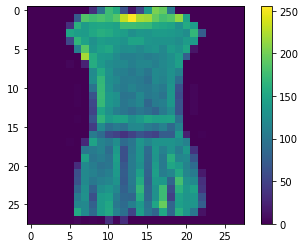

In [11]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255

test_images = test_images/255

## Data Understanding 

To gain an understanding of what our model will be predicting, we will generate the first 25 images in the dataset with their 
data labels. This sample will also confirm that the data was preprocessed correctly.

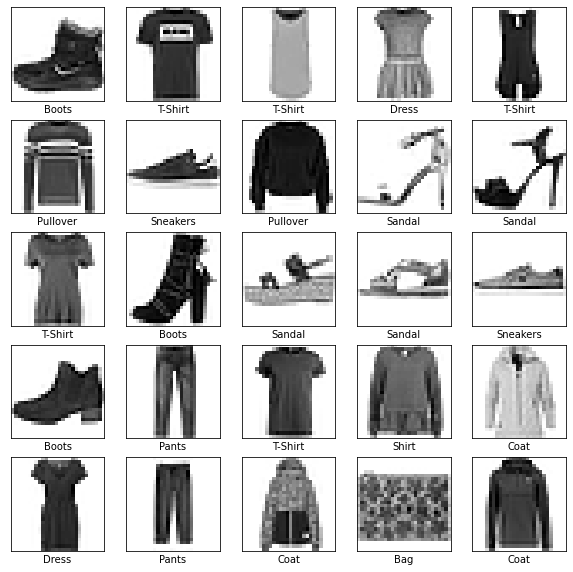

In [13]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

## Model Building and Understanding

The basic building blocks of a neural network are the layers. Layers extract meaningful representations from the data.

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. 

The Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 

The MaxPooling2D layer downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window for each channel of the input. 

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

The Flatten layer converts the pixel dimensions to a one-dimensional array so that the images are not stacked on top of each other.

A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.

Before the model is ready for training, we add several features during the compile stage to minimize loss, optimize the model,
and set a success metric for the model performance.



In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(filters = 64,
                  kernel_size = (5,5),
                  input_shape = (28, 28, 1),
                  activation = 'relu'))

In [16]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [17]:
model.add(Dropout(0.5))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

In [20]:
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Model Training 

We fit the model to our training data and allow it to run through several iterations (epochs) to strengthen predictive ability.

In [23]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.5145 - accuracy: 0.8164
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3767 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3368 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3136 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2985 - accuracy: 0.8894


## Model Assessment 

The model performs well on the test data. This indicates that the model is fairly accurate. 

We can check an individual image to assess the model. Our model is confident that the first image is a boot, and we can see that it is.

We can define a function which returns any image in the dataset by index along with a visualization of the model performance.
Shown below are an image the model predicted correctly, incorrectly, and a case where the model was uncertain but chose correctly.

Lastly we can return a batch of images with their respective predictions. 

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.2744 - accuracy: 0.8969
Test Accuracy: 0.8968999981880188


In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([3.1306687e-08, 1.2616319e-09, 8.0071777e-10, 4.2675081e-09,
       3.2742142e-10, 6.9634443e-05, 4.4990127e-09, 4.6789274e-04,
       6.5047566e-08, 9.9946243e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

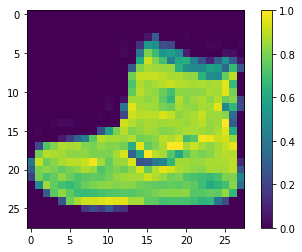

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
            
    plt.xlabel("{} {:2.0f}% ({}))".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color = color)
    
def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

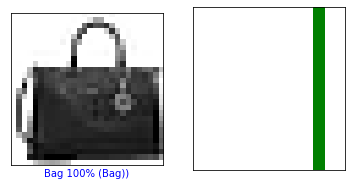

In [31]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

plt.show()

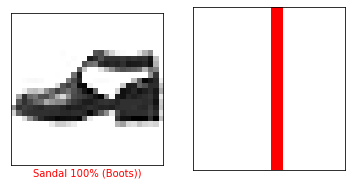

In [32]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

plt.show()

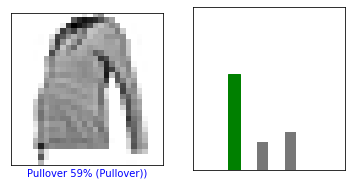

In [33]:
i = 48
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

plt.show()

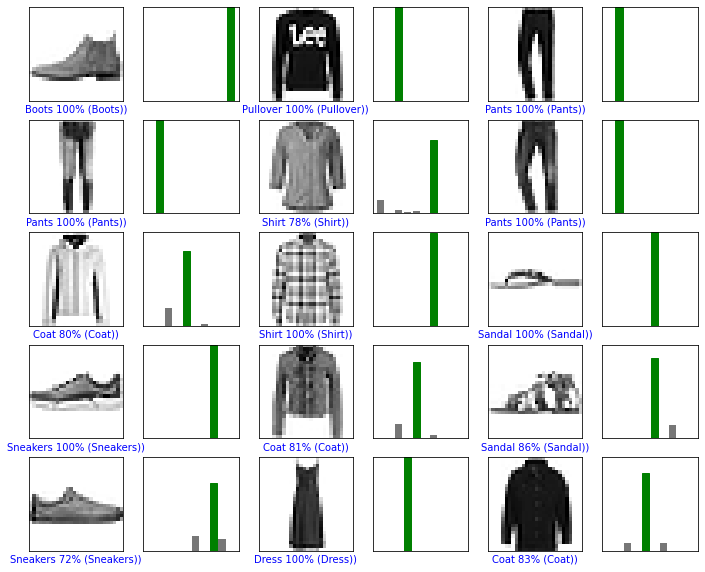

In [34]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols

plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    
plt.show()


## Conclusion

In conclusion, a simple neural network can accurately classify images for the online clothing marketplace. 